# Parameters Sweep Analysis

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

In [5]:
import matplotlib.colors as colors
import matplotlib.transforms as mtrans

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

matplotlib.rc('font', **font)

**Generate plot across axis**

In [7]:
Ss = [1.2, 0.8, 0.4, 0, -0.4, -0.8] # Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [0.2,  0.6,  1,  1.4,  1.8,  2.2]# Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [79]:
dimensions = 6

In [8]:
sorted_cvs_files_expected = [f"../matlab/data/expected/clean_S_{S}_T_{T}_beta_10.csv" for S in Ss for T in Ts]

In [9]:
over_ps, over_qs = [], []

for i, file in enumerate(sorted_cvs_files_expected):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps.append(ps), over_qs.append(qs)

In [96]:
vmaxs = []

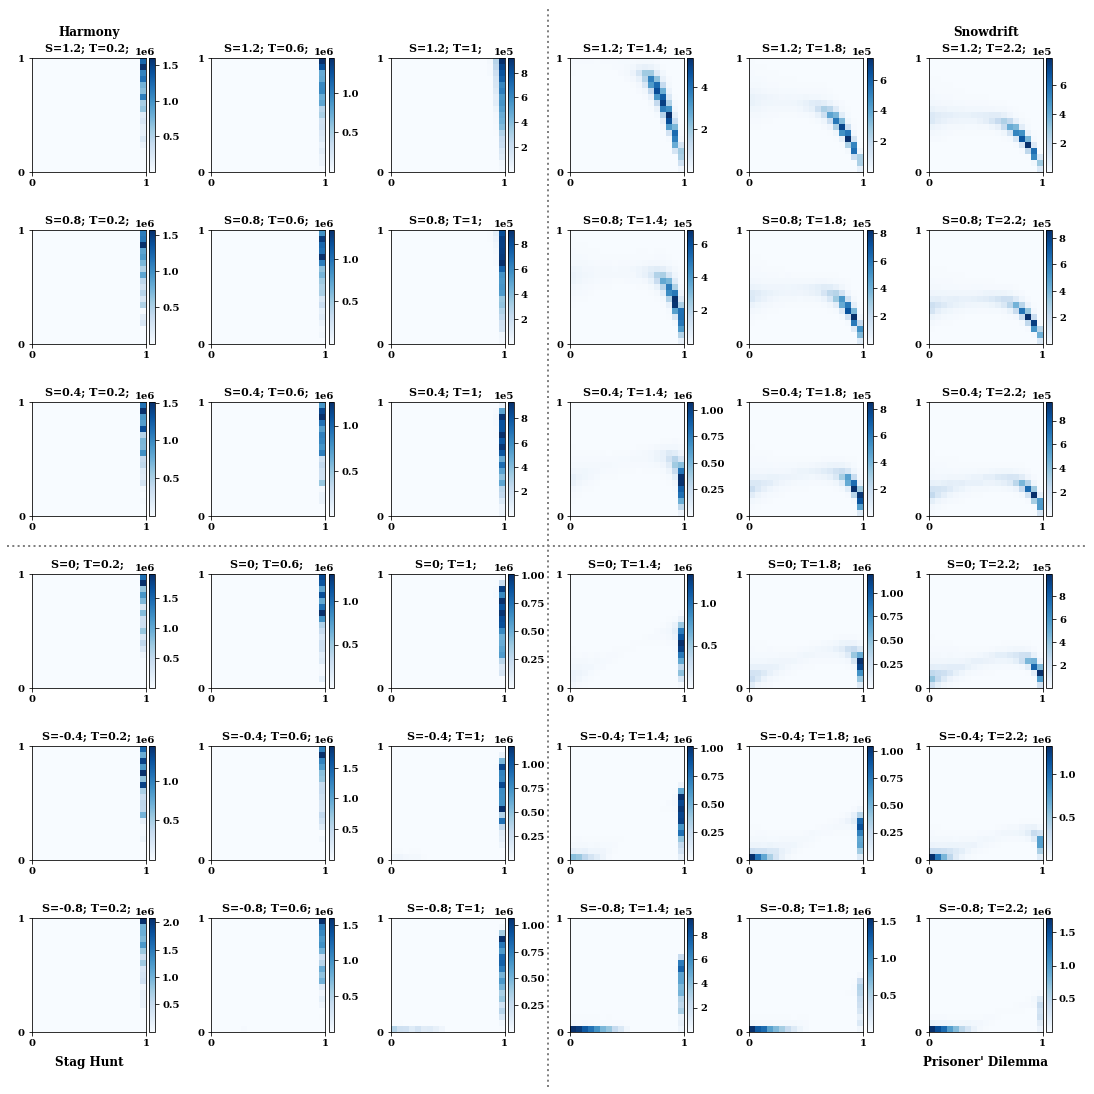

In [98]:
fig, axes = plt.subplots(nrows=dimensions, ncols=dimensions, figsize=(15, 15));

for i, file in enumerate(sorted_cvs_files_expected):
    
    text_file = open((file[:24] + file[30:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps[i], over_qs[i]
    
    title = data[0].replace(",", "")[5:-48]
    
    index = (int(i / dimensions), i % dimensions)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
    heatmap = np.where(heatmap==0, 1, heatmap) 
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    vmaxs.append(heatmap.max())

    im = axes[index].imshow(heatmap.T,
                            extent=extent,
                            origin="lower", 
                            cmap=cmaps[0])


    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold", fontsize=11)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    cbar.formatter.set_powerlimits((0, 0))
    

h_line = plt.Line2D([0.501, 0.501],[0, 1], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.501, .501], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", transform=axes[0, 0].transAxes, ha="center", fontsize=12)
axes[0, -1].text(0.5, 1.2, "Snowdrift", transform=axes[0, -1].transAxes, ha="center", fontsize=12)
axes[-1, -1].text(0.5, -.3, "Prisoner' Dilemma", transform=axes[-1, -1].transAxes, ha="center", fontsize=12)
axes[-1, 0].text(0.5, -.3, "Stag Hunt", transform=axes[-1, 0].transAxes, ha="center", fontsize=12)

plt.tight_layout()
fig.savefig("../static/expected_two_by_two_games.pdf", bbox_inches='tight')

**Similar for stochastic payoffs**

In [93]:
sorted_cvs_files_stochastic = [f"../matlab/data/stochastic/clean_S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

In [30]:
over_ps_stoch, over_qs_stoch = [], []

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_stoch.append(ps), over_qs_stoch.append(qs)

In [102]:
fig.colorbar?

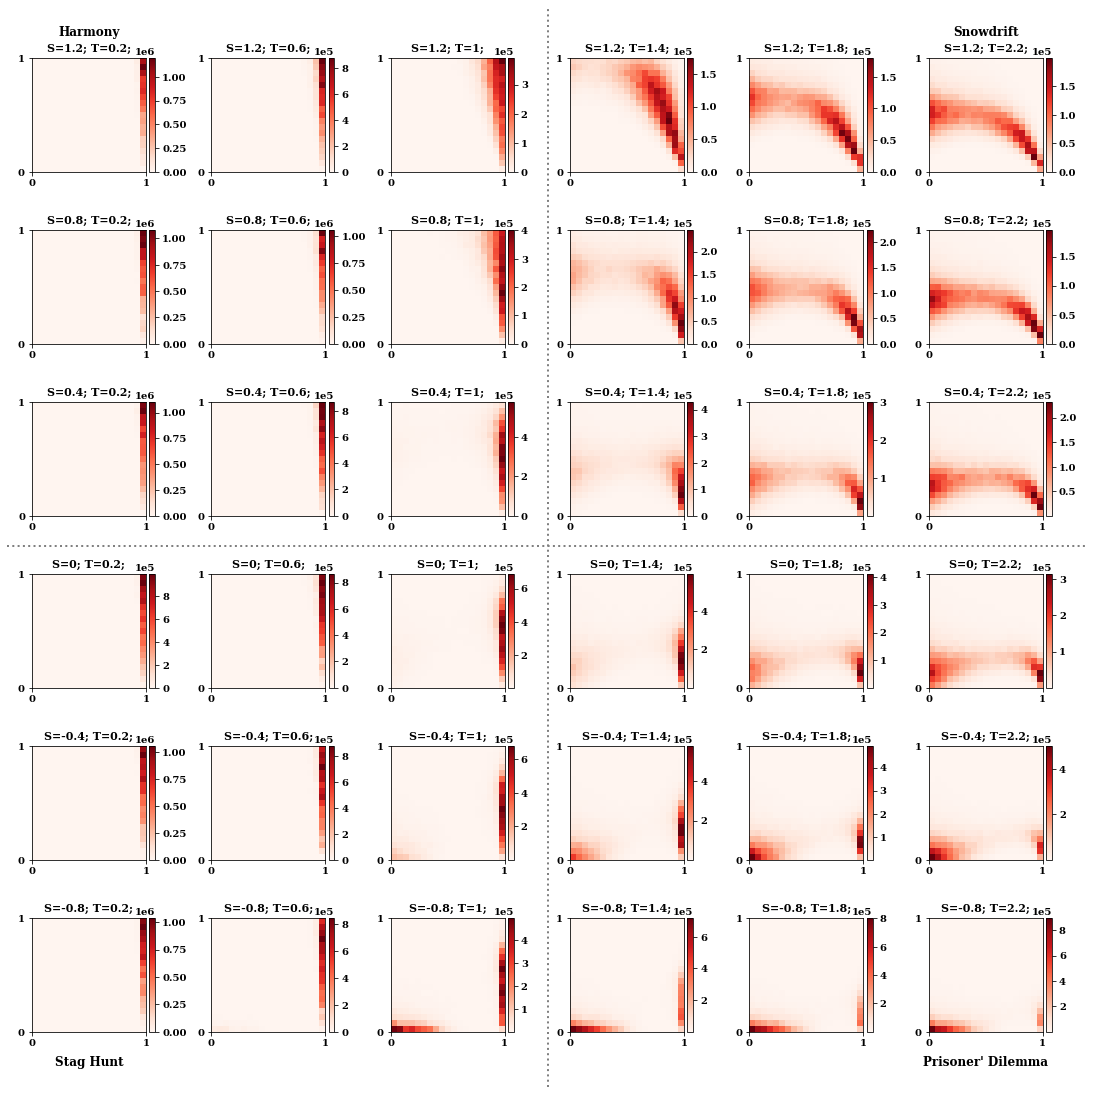

In [105]:
fig, axes = plt.subplots(nrows=dimensions, ncols=dimensions, figsize=(15, 15));

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    text_file = open((file[:26] + file[32:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps_stoch[i], over_qs_stoch[i]
    
    title = data[0].replace(",", "")[5:-48]
    
    index = (int(i / dimensions), i % dimensions)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    im = axes[index].imshow(heatmap.T,
                            extent=extent,
                            origin="lower",
                            cmap=cmaps[1],)

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold", fontsize=11)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    cbar.formatter.set_powerlimits((0, 0))
    

h_line = plt.Line2D([0.501, 0.501],[0, 1], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.501, .501], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", transform=axes[0, 0].transAxes, ha="center", fontsize=12)
axes[0, -1].text(0.5, 1.2, "Snowdrift", transform=axes[0, -1].transAxes, ha="center", fontsize=12)
axes[-1, -1].text(0.5, -.3, "Prisoner' Dilemma", transform=axes[-1, -1].transAxes, ha="center", fontsize=12)
axes[-1, 0].text(0.5, -.3, "Stag Hunt", transform=axes[-1, 0].transAxes, ha="center", fontsize=12)


plt.tight_layout()
fig.savefig("../static/stochastic_two_by_two_games.pdf", bbox_inches='tight')

**snowdrift difference in behaviour**

In [106]:
exp = pd.read_csv("../matlab/data/expected/clean_S_0.8_T_2.2_beta_10.csv") 
st = pd.read_csv("../matlab/data/stochastic/clean_S_0.8_T_2.2_beta_10.csv") 

In [107]:
exp.head()

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
1,0.632677,0.490765,0.479429,0.485076,0.984587,2,49
2,0.303213,0.060683,0.240890,0.204192,0.529167,51,34
3,0.893949,0.809722,0.391687,0.673422,1.113154,85,28
4,0.935940,0.592020,0.744358,0.646207,1.103282,113,2


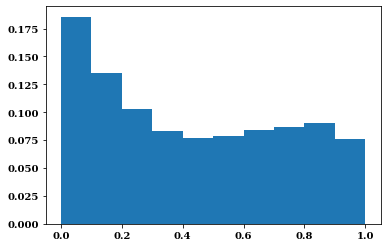

In [108]:
weights = np.ones_like(exp['p']) / float(len(exp['p']))
plt.hist(exp['p'], weights=weights);

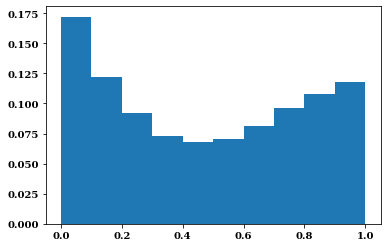

In [109]:
weights = np.ones_like(st['p']) / float(len(st['p']))
plt.hist(st['p'], weights=weights);

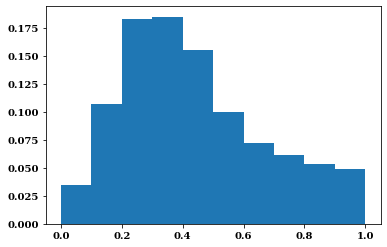

In [110]:
weights = np.ones_like(exp['q']) / float(len(exp['q']))
plt.hist(exp['q'], weights=weights);

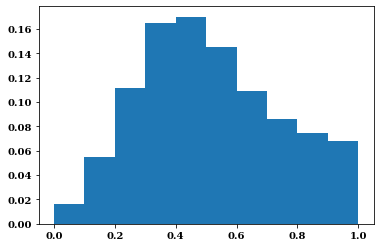

In [111]:
weights = np.ones_like(st['q']) / float(len(st['q']))
plt.hist(st['q'], weights=weights);

**Round Two**

In [33]:
sorted_cvs_files_rounds = [f"../matlab/data/round_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [34]:
over_ps_rounds, over_qs_rounds = [], []

for i, file in enumerate(sorted_cvs_files_rounds):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_rounds.append(ps), over_qs_rounds.append(qs)

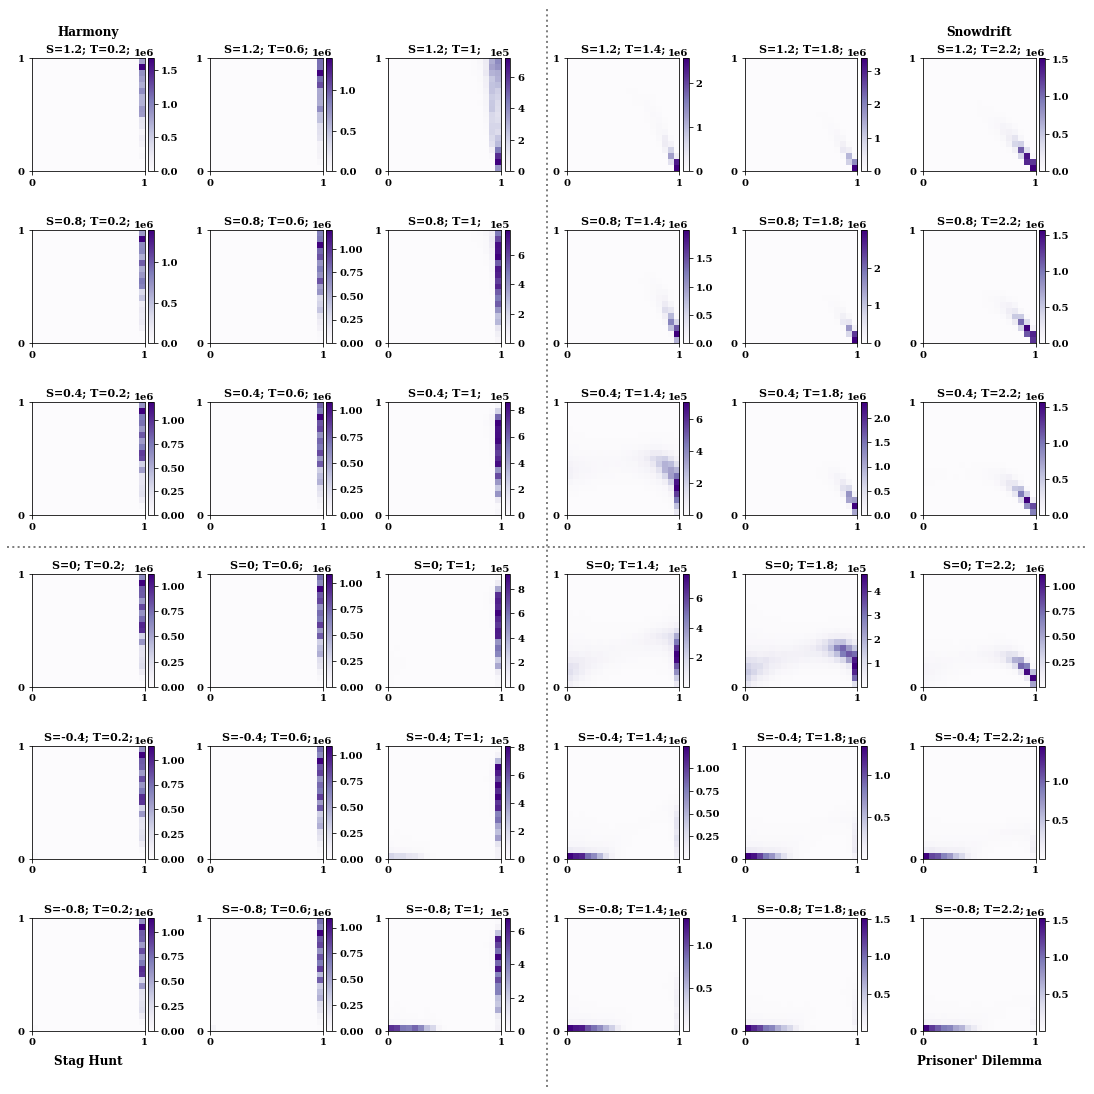

In [38]:
fig, axes = plt.subplots(nrows=dimensions, ncols=dimensions, figsize=(15, 15));

for i, file in enumerate(sorted_cvs_files_rounds):
    
    text_file = open((file[:25] + file[31:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps_rounds[i], over_qs_rounds[i]
    
    title = data[0].replace(",", "")[5:-35]
    
    index = (int(i / dimensions), i % dimensions)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[3])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold", fontsize=11)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    cbar.formatter.set_powerlimits((0, 0))
    

h_line = plt.Line2D([0.50, 0.50],[0, 1], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.50, .50], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", transform=axes[0, 0].transAxes, ha="center", fontsize=12)
axes[0, -1].text(0.5, 1.2, "Snowdrift", transform=axes[0, -1].transAxes, ha="center", fontsize=12)
axes[-1, -1].text(0.5, -.3, "Prisoner' Dilemma", transform=axes[-1, -1].transAxes, ha="center", fontsize=12)
axes[-1, 0].text(0.5, -.3, "Stag Hunt", transform=axes[-1, 0].transAxes, ha="center", fontsize=12)


plt.tight_layout()
    

fig.savefig("../static/rounds_two_by_two_games.pdf", bbox_inches='tight')

**Opponents**

In [36]:
sorted_cvs_files_opponents = [f"../matlab/data/opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [39]:
over_ps_opp, over_qs_opp = [], []

for i, file in enumerate(sorted_cvs_files_opponents):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_opp.append(ps), over_qs_opp.append(qs)

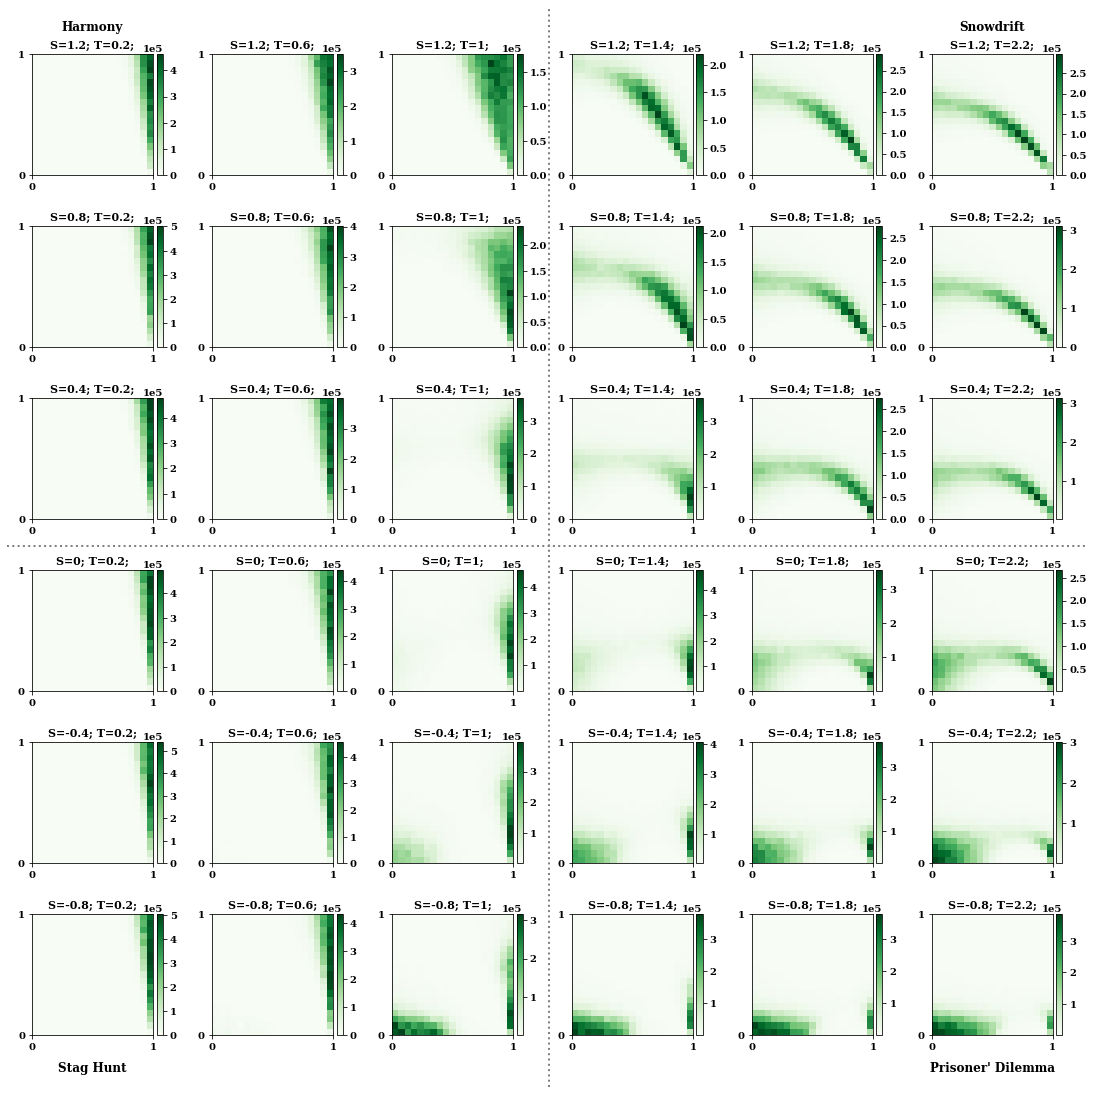

In [58]:
fig, axes = plt.subplots(nrows=dimensions, ncols=dimensions, figsize=(15, 15));

for i, file in enumerate(sorted_cvs_files_stochastic):
    
    text_file = open((file[:26] + file[32:]).replace("csv", "txt"), "r")
    data = text_file.readlines()
    
    ps, qs = over_ps_opp[i], over_qs_opp[i]
    
    title = data[0].replace(",", "")[5:-48]
    
    index = (int(i / dimensions), i % dimensions)
    
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmaps[2])

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold", fontsize=11)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    cbar.formatter.set_powerlimits((0, 0))
    

h_line = plt.Line2D([0.502, 0.502],[0, 1], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.501, .501], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", transform=axes[0, 0].transAxes, ha="center", fontsize=12)
axes[0, -1].text(0.5, 1.2, "Snowdrift", transform=axes[0, -1].transAxes, ha="center", fontsize=12)
axes[-1, -1].text(0.5, -.3, "Prisoner' Dilemma", transform=axes[-1, -1].transAxes, ha="center", fontsize=12)
axes[-1, 0].text(0.5, -.3, "Stag Hunt", transform=axes[-1, 0].transAxes, ha="center", fontsize=12)

plt.tight_layout()
fig.savefig("../static/opponents_two_by_two_games.pdf", bbox_inches='tight')

**Rounds - opponents**

In [61]:
sorted_cvs_files = [f"../matlab/data/rounds_opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [62]:
over_ps_last, over_qs_last = [], []

for i, file in enumerate(sorted_cvs_files):
    
    df = pd.read_csv(file, dtype=np.float64)
    
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    over_ps_last.append(ps), over_qs_last.append(qs)

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(nrows=dimensions, ncols=dimensions, figsize=(15, 15));

for i, file in enumerate(sorted_cvs_files):
    

    df = dd.read_csv(file)

    text_file = open(file.replace("csv", "txt").replace("clean_", ""), "r")
    data = text_file.readlines()

    ps = df['p'].values.compute()
    qs = df['q'].values.compute()
    title = data[0].replace(",", "")[5:-35]

    index = (int(i / dimensions), i % dimensions)

    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[-1], origin="lower")

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    axes[index].set_title(title, weight="bold", fontsize=11)

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2))
    
    cbar.formatter.set_powerlimits((0, 0))
    

h_line = plt.Line2D([0.495, 0.495],[0, 1], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(h_line)
v_line = plt.Line2D([0, 1],[.501, .501], transform=fig.transFigure, color="grey", linewidth=2, linestyle=":")
fig.add_artist(v_line)

axes[0, 0].text(0.5, 1.2, "Harmony", transform=axes[0, 0].transAxes, ha="center", fontsize=12)
axes[0, -1].text(0.5, 1.2, "Snowdrift", transform=axes[0, -1].transAxes, ha="center", fontsize=12)
axes[-1, -1].text(0.5, -.3, "Prisoner' Dilemma", transform=axes[-1, -1].transAxes, ha="center", fontsize=12)
axes[-1, 0].text(0.5, -.3, "Stag Hunt", transform=axes[-1, 0].transAxes, ha="center", fontsize=12)


    
plt.tight_layout();

fig.savefig("../matlab/images/merged_plot_rounds_opponents_two.pdf")